In [1]:
using Controlz, DifferentialEquations, PyPlot

PyPlot.matplotlib.font_manager.fontManager.addfont("OpenSans-Regular.ttf")
# PyPlot.matplotlib.font_manager.fontManager.addfont("Abel-Regular.ttf")
PyPlot.matplotlib.style.use("grandbudapest.mplstyle")

function draw_axes()
    axvline(x=0, color="0.6", zorder=1)
#     axhline(y=0, color="0.6", zorder=1)
end

In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

draw_axes (generic function with 1 method)

$\tau \frac{dT}{dt}=T_a-T$

let $\theta := t/\tau$. $d\theta=dt/\tau$

$\frac{dT}{d\theta}=T_a-T$

let $\xi = T - T_a$

$d\xi=dT$.

$\frac{d\xi}{d\theta}=-\xi$

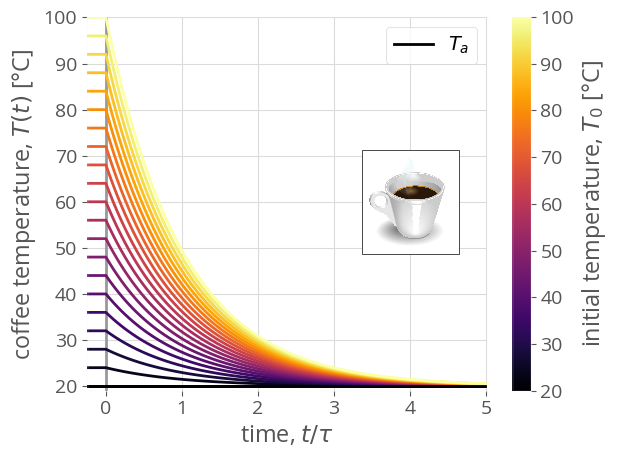

In [3]:
T_a = 20.0

f(T, p, t) = T_a - T
tspan = (0.0, 5.0)

fig, ax = subplots()
cmap = get_cmap("inferno")
t = collect(range(0.0, tspan[2], length=100))
T0s = range(T_a, 100.0, length=21)
for T0 in T0s 
    prob = ODEProblem(f, T0, tspan)
    sol = solve(prob)
    T = sol.(t)
    plot(vcat([-0.25], t), vcat([T0], T), 
        color=cmap((T0 - minimum(T0s)) / (maximum(T0s) - minimum(T0s)))
        )
end
xlabel(L"time, $t/\tau$")
ylabel(L"coffee temperature, $T(t)$ [°C]")
axhline(y=T_a, color=cmap((T_a - minimum(T0s)) / (maximum(T0s) - minimum(T0s))), label=L"$T_a$")
xlim([-0.25, tspan[2]+0.01])
ylim([19., 100.1])
legend()

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=minimum(T0s), vmax=maximum(T0s)))
colorbar(sm, label=L"initial temperature, $T_0$ [°C]")

#Add png to plot
mof_fig = imread("coffee.png")
imagebox = PyPlot.matplotlib.offsetbox.OffsetImage(mof_fig, zoom=0.05, filternorm=100.0)
ab = PyPlot.matplotlib.offsetbox.AnnotationBbox(imagebox, (4, 60.0))
ax.add_artist(ab)

draw_axes()

tight_layout()

savefig("coffee_inverse_problem.pdf", format="pdf", transparent=true)